In [26]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

h2o.init()
data = h2o.import_file('API_score.csv')
x = data.columns
y = "sentiment"
x.remove(y)
data[y] = data[y].asfactor()

aml = H2OAutoML(max_runtime_secs = 60*10)
aml.train(x = x, y = y,
          training_frame = data)

model = aml.leaderboard
model

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 11 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.6
H2O cluster version age:,8 days
H2O cluster name:,H2O_from_python_yiyi3_o74i7j
H2O cluster total nodes:,1
H2O cluster free memory:,1.573 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_per_class_error,logloss,rmse,mse
GBM_grid_1_AutoML_20190322_143401_model_2,0.517348,0.633213,0.460432,0.211998
GBM_grid_1_AutoML_20190322_143401_model_13,0.521775,0.646734,0.448842,0.20146
StackedEnsemble_BestOfFamily_AutoML_20190322_143401,0.532102,0.636645,0.441232,0.194685
GBM_grid_1_AutoML_20190322_143401_model_26,0.533679,0.621452,0.438389,0.192185
GBM_3_AutoML_20190322_143401,0.533934,0.63786,0.455318,0.207314
GBM_grid_1_AutoML_20190322_143401_model_16,0.535511,0.752672,0.469799,0.220711
GBM_grid_1_AutoML_20190322_143401_model_20,0.537291,0.603439,0.444596,0.197666
GBM_grid_1_AutoML_20190322_143401_model_27,0.537546,0.616314,0.449239,0.201816
DeepLearning_grid_1_AutoML_20190322_143401_model_2,0.539886,1.14747,0.466202,0.217345
DeepLearning_grid_1_AutoML_20190322_143401_model_1,0.541972,0.873071,0.483193,0.233476


In [31]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_20190322_143401_model_2


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.15407468398223947
RMSE: 0.3925234820774924
LogLoss: 0.4767330480748992
Mean Per-Class Error: 0.4818884818884819
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,Error,Rate
0.0,5.0,0.0,1.0,5 / 5
0.0,115.0,2.0,0.0170940,2 / 117
0.0,24.0,32.0,0.4285714,24 / 56
0.0,144.0,34.0,0.1741573,31 / 178


Top-3 Hit Ratios: 


k,hit_ratio
1,0.8258427
2,0.9719101
3,1.0



ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.21199769675014563
RMSE: 0.46043207615254783
LogLoss: 0.6332131131502787
Mean Per-Class Error: 0.5173483923483925
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,Error,Rate
0.0,5.0,0.0,1.0,5 / 5
0.0,113.0,4.0,0.0341880,4 / 117
0.0,29.0,27.0,0.5178571,29 / 56
0.0,147.0,31.0,0.2134831,38 / 178


Top-3 Hit Ratios: 


k,hit_ratio
1,0.7865169
2,0.9662921
3,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.7866667,0.0146144,0.7777778,0.8055556,0.75,0.8,0.8
err,0.2133333,0.0146144,0.2222222,0.1944444,0.25,0.2,0.2
err_count,7.6,0.5656855,8.0,7.0,9.0,7.0,7.0
logloss,0.6329293,0.0369553,0.6195024,0.5995686,0.7302462,0.6360946,0.5792344
max_per_class_error,0.8,0.1743939,1.0,1.0,1.0,0.4545455,0.5454546
mean_per_class_accuracy,0.6141919,0.1170883,0.4722222,0.540404,0.4333333,0.8207071,0.8042929
mean_per_class_error,0.3858081,0.1170883,0.5277778,0.4595959,0.5666667,0.1792929,0.1957071
mse,0.2118568,0.0174259,0.2088474,0.1942207,0.2575866,0.2117789,0.1868504
r2,0.1680170,0.0871463,0.2199822,0.3769555,0.0928472,0.0173139,0.1329860
rmse,0.4595378,0.0184629,0.4569982,0.4407047,0.5075299,0.4601944,0.4322619


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
,2019-03-22 14:34:12,0.639 sec,0.0,0.6666667,1.0986123,0.4325843
,2019-03-22 14:34:12,0.664 sec,5.0,0.5933385,0.9028197,0.1966292
,2019-03-22 14:34:12,0.671 sec,10.0,0.5372412,0.7754436,0.1966292
,2019-03-22 14:34:12,0.677 sec,15.0,0.4966650,0.6898811,0.1853933
,2019-03-22 14:34:12,0.684 sec,20.0,0.4631807,0.6216112,0.1910112
,2019-03-22 14:34:12,0.689 sec,25.0,0.4373024,0.5694153,0.1853933
,2019-03-22 14:34:12,0.694 sec,30.0,0.4175714,0.5290856,0.1741573
,2019-03-22 14:34:12,0.703 sec,35.0,0.4022696,0.4979259,0.1685393
,2019-03-22 14:34:12,0.708 sec,39.0,0.3925235,0.4767330,0.1741573


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
google,104.9519196,1.0,0.3198447
ibm,90.4254150,0.8615890,0.2755746
amazon,71.4222641,0.6805237,0.2176619
microsoft,61.3344307,0.5844050,0.1869188


gbm prediction progress: |████████████████████████████████████████████████| 100%


<Figure size 432x288 with 0 Axes>

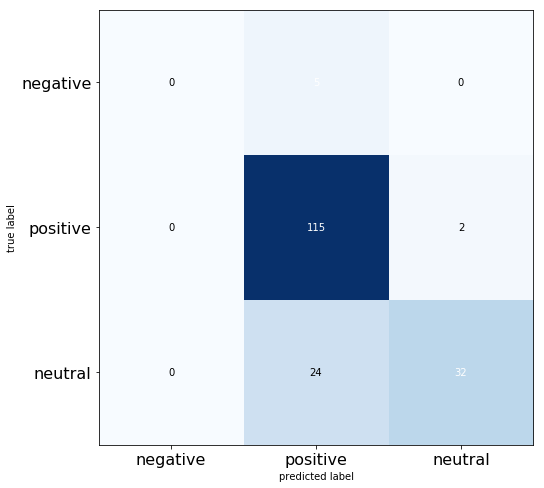

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

pred = aml.predict(data[x])
pd = pred.as_data_frame()
pd = pd['predict'].tolist()
label = data[y].as_data_frame()
label = label.values.tolist()
cm=confusion_matrix(label, pd)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(3), ['negative','positive','neutral'], fontsize=16)
plt.yticks(range(3), ['negative','positive','neutral'], fontsize=16)
plt.show()
